# 概述

## Numpy是什么

> Numerical Python

- 一个开源的python科学计算库
- 使用Numpy可以方便的使用**数组、矩阵**进行计算
- 包含**线性代数、傅里叶变换、随机数生成**等大量函数

## 为什么使用Numpy

- 对于同样的数值计算任务，使用Numpy比直接Python代码实现，优点：
    - 代码更简洁：Numpy直接以**数组、矩阵**为粒度计算并且支撑大量的数学函数，而python需要用for循环从底层实现；
    - 性能更高效：Numpy的数组存储效率和输入输出计算性能，比Python使用List或者嵌套List好很多；
        - 注：Numpy的数据存储和Python原生的List是不一样的
        - 注：Numpy的大部分代码都是**C语言**实现的，这是Numpy比纯Python代码高效的原因
- Numpy是Python各种数据科学类库的**基础库**：
    - 比如：Scipy，Scikit-Learn、TensorFlow，pandas等

## 入门体验

In [1]:
import numpy as np

In [2]:
np.__version__

'1.21.5'

需求：
实现两个数组的加法
1. 数组A是0到N-1的平方
2. 数组B是0到N-1的立方

对比使用numpy和原生的python性能

In [3]:
# 原生python实现
def python_sum(n):
    '''
    原生python实现2个数组的加法
    '''
    # 使用列表生成式创建1到N的平方
    a = [i**2 for i in range(n)]
    # 使用列表生成式创建1到N的立方
    b = [i**3 for i in range(n)]
    # 新创建新列表
    ab_sum = []
    # 循环a的索引
    for i in range(n):
        # 将a中的对应元素与b中对应的元素相加
        ab_sum.append(a[i]+b[i])
    return ab_sum

In [4]:
python_sum(10)

[0, 2, 12, 36, 80, 150, 252, 392, 576, 810]

In [5]:
def numpy_sum(n):
    '''
    numpy实现2个数组的加法
    '''
    a = np.arange(n) ** 2
    b = np.arange(n) ** 3
    return a + b

In [6]:
numpy_sum(10)

array([  0,   2,  12,  36,  80, 150, 252, 392, 576, 810], dtype=int32)

对比实现1000次

In [8]:
%timeit python_sum(1000)

1.51 ms ± 57.9 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [9]:
%timeit numpy_sum(1000)

22.9 µs ± 2.13 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


对比实现10w次

In [10]:
%timeit python_sum(100000)

162 ms ± 5.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [11]:
%timeit numpy_sum(100000)

992 µs ± 35.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


对比实现100w次

In [12]:
%timeit python_sum(1000000)

1.69 s ± 67.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [13]:
%timeit numpy_sum(1000000)

16.3 ms ± 288 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


绘图对比

In [14]:
import pandas as pd
# 创建数据
python_times = [1.55*1000,143*1000,1.64*1000*1000]
numpy_times = [15,1.32*1000,14.9*1000]

In [15]:
# 创建pandas的DataFrame类型数据
charts_data = pd.DataFrame({
    'python_times':python_times,
    'numpy_times':numpy_times,
})

In [16]:
charts_data

,python_times,numpy_times
0,1550.0,15.0
1,143000.0,1320.0
2,1640000.0,14900.0


In [19]:
from jupyterthemes import jtplot
jtplot.style()

<AxesSubplot:>

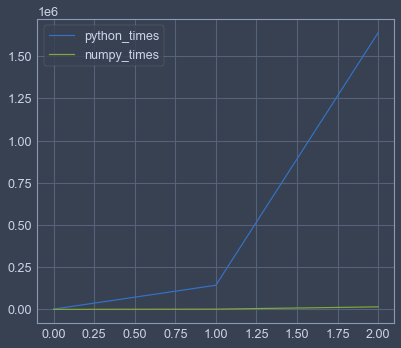

In [20]:
# 线性图
charts_data.plot()

<AxesSubplot:>

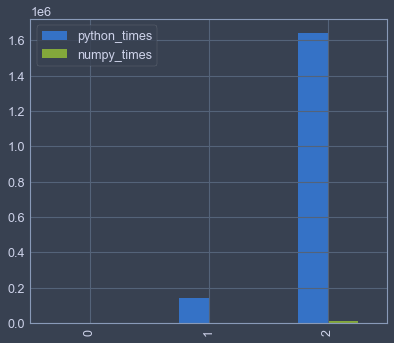

In [21]:
# 柱状图
charts_data.plot.bar()

# ndarray对象的生成与访问

## 概述

- NumPy 定义了一个 n 维数组对象，简称 ndarray 对象，它是一个一系列**相同类型元素**组成的数组集合。数组中的每个元素都占有大小相同的内存块 
- ndarray 对象采用了数组的**索引机制**，将数组中的每个元素**映射**到内存块上，并且按照一定的布局对内存块进行排列(行或列)。
- 对 ndarray 对象直接使用运算符时，通常会对数组内的元素直接进行运算，不需要遍历操作
- 通常来讲，numpy有`ndarray.method()`和`numpy.function()`两类封装好的运算

## 通过现有序列生成数组

`numpy.array(object, dtype = None, copy = True, order = None,subok=False,ndmin = 0)`

![](pics/[{1V1\)6@~%KF0A5O}0~`~SN.png)
> copy和subok之后会详解，order先不用了解

- `array()`函数：括号内可以是**列表、元组、数组、迭代对象、生成器**等
- 列表中**元素类型**不相同时，会按照所占**存储空间最大的类型**转换
- 嵌套序列元素数量不同时，会出错

In [33]:
#array()函数，括号内可以是列表、元祖、数组、迭代对象,生成器等
np.array([1,2,3,4,5])

array([1, 2, 3, 4, 5])

In [25]:
# 元组
np.array((1,2,3,4,5))

array([1, 2, 3, 4, 5])

In [36]:
a = np.array([1,2,3,4,5])
# 数组
b = np.array(a)
b

array([1, 2, 3, 4, 5])

> 注意这里copy数组的方法，之后会详解

In [31]:
# 迭代对象
np.array(range(10))

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [34]:
# 生成器
np.array([i**2 for i in range(10)])

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

In [37]:
# 列表中元素类型不相同
# 按照所占存储空间最大的类型转换
np.array([1,1.5,3,4.5,'5'])

array(['1', '1.5', '3', '4.5', '5'], dtype='<U32')

In [39]:
ar3 = np.array([
                [1,2,3],
                ('a','b','c')
               ])   # 二维数组：嵌套序列（列表，元组均可）
ar3

array([['1', '2', '3'],
       ['a', 'b', 'c']], dtype='<U11')

In [42]:
# 注意嵌套序列元素数量不一致会怎么样
ar4 = np.array([[1,2,3],('a','b','c','d')])   
ar4

C:\Users\不怕晒的铃铛\AppData\Local\Temp\ipykernel_868\3827356794.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ar4 = np.array([[1,2,3],('a','b','c','d')])


array([list([1, 2, 3]), ('a', 'b', 'c', 'd')], dtype=object)

In [44]:
# 注意嵌套序列数量不一会怎么样
ar4 = np.array([[1,2,3],[1,2,3,4]]) 
ar4

C:\Users\不怕晒的铃铛\AppData\Local\Temp\ipykernel_868\1210354137.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ar4 = np.array([[1,2,3],[1,2,3,4]])


array([list([1, 2, 3]), list([1, 2, 3, 4])], dtype=object)

### dtype相关

1. 设置dtype参数，默认自动识别

In [48]:
a = np.array([1,2,3,4,5])
print(a)
# 设置数组元素类型
has_dtype_a = np.array([1,2,3,4,5],dtype='float')
has_dtype_a
# [1.,2.,3.,4.,5.]

[1 2 3 4 5]


array([1., 2., 3., 4., 5.])

> 思考如果将浮点型的数据设置为整形，会是什么情况？

In [49]:
np.array([1.1,2.5,3.8,4,5],dtype='int')
# 默认没有四舍五入。如果想四舍五入，可以使用round()函数

array([1, 2, 3, 4, 5])

### copy相关

2. 设置copy参数，在创建时是否是深拷贝，默认为`True`
> 这也是**复制数组**的一种方式

深拷贝：
- `np.array()`
- `np.copy()`

浅拷贝：
- `np.asarray()`

In [58]:
a = np.array([1,2,3,4,5])
# 定义b，复制a
b = np.array(a)
# 输出a和b的id
print('a:', id(a), '  b:', id(b))
print('以上看出a和b的内存地址')
b[0] = 10
print(a)

a: 1331723216432   b: 1331722608432
以上看出a和b的内存地址
[1 2 3 4 5]


In [59]:
# 当修改b的元素时，a不会发生变化
b[0] = 10
print('a:', a,'  b:', b)
print('=' * 10)

a: [1 2 3 4 5]   b: [10  2  3  4  5]


In [67]:
a = np.array([1,2,3,4,5])
# 定义b，当设置copy参数为Fasle时，不会创建副本，
# 两个变量会指向相同的内容地址，没有创建新的对象
b = np.array(a, copy=False)
# 输出a和b的id
print('a:', id(a), '  b:', id(b))
print('以上看出a和b的内存地址')
# 由于a和b指向的是相同的内存地址，因此当修改b的元素时，a会发生变化
b[0] = 10
print('a:',a,'  b:',b)

a: 1331722627472   b: 1331722627472
以上看出a和b的内存地址
a: [10  2  3  4  5]   b: [10  2  3  4  5]


In [68]:
#定义个数组
a = np.array([2,4,3,1])
# 在定义b时，如果想复制a的几种方案：

# 1.使用np.array()
b = np.array(a)
print('b = np.array(a)：',id(b),id(a))

# 2.使用数组的copy()方法
c = a.copy()
print('c = a.copy()：',id(c),id(a))

# 注意不能直接使用=号复制，直接使用=号，会使2个变量指向相同的内存地址
d = a
# 修改d也会相应的修改a
print('d = a：',id(d),id(a))

b = np.array(a)： 1331723286448 1331723286160
c = a.copy()： 1331722627472 1331723286160
d = a： 1331723286160 1331723286160


### ndmin相关

3. `ndmin`用于指定数组的维度

In [64]:
a = np.array([1,2,3])
print(a)
a = np.array([1,2,3], ndmin=2)
print(a.ndim)
a

[1 2 3]
2


array([[1, 2, 3]])

### subok相关

4. `subok`参数，类型为bool值，默认False。
- True: 使用object的内部数据类型
- False：使用数组数据类型。

In [66]:
# 创建一个矩阵
a = np.mat([1,2,3,4])
# 输出为矩阵类型
print(type(a))

#既要复制一份副本，又要保持原类型
at = np.array(a,subok=True)
af = np.array(a)  # 默认为False
print('at,subok为True:',type(at))
print(at)
print('af,subok为False:',type(af))
print(af)
print(id(at),id(a))

<class 'numpy.matrix'>
at,subok为True: <class 'numpy.matrix'>
[[1 2 3 4]]
af,subok为False: <class 'numpy.ndarray'>
[[1 2 3 4]]
1331723282016 1331723281904


## 生成序列数组

根据 start 与 stop 指定的范围以及 step 设定的步长，生成一个 ndarray

<b>numpy.arange(start, stop, step, dtype)</b>

参数说明   

| 序号 | 参数 | 描述说明 |
| :--- | :--- | :--- |
| 1      | start| 起始值，默认为0   |
| 2   | stop | 终止值（不包含）        |
| 3      | step | 步长，默认为1        |
| 4      | dtype |  返回ndarray的数据类型，如果没有提供，则会使用输入数据的类型。     |

In [71]:
np.arange(10)
# np.array(range(10))

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [72]:
# 可以使用浮点型数值
np.arange(3.1)

array([0., 1., 2., 3.])

In [73]:
# 这个的结果？
range(3.1)
# a --- [0., 1., 2., 3.]
# b --- [0, 1, 2, 3]
# c --- 错误 √

TypeError: 'float' object cannot be interpreted as an integer

In [74]:
# 想返回浮点型的，也可以指定类型
x = np.arange(5, dtype =  float)  
x

array([0., 1., 2., 3., 4.])

In [75]:
# 起始10 ，终止值20 步长2
np.arange(10,20,2)

array([10, 12, 14, 16, 18])

In [77]:
# 起始0，终止值20，步长3
ar2 = np.arange(20,3) # 这个书写是否正确?
print(ar2)
# A - 正确
# B - 错误 √

[]


In [80]:
#正确的书写格式是什么
# 起始0，终止值20，步长3
ar2 = np.arange(0, 20, 3) # 这个书写是否正确? √
print(ar2)
ar3 = np.arange(20, step = 3)
ar3

[ 0  3  6  9 12 15 18]


array([ 0,  3,  6,  9, 12, 15, 18])

In [82]:
# 如果数组太大而无法打印，NumPy会自动跳过数组的中心部分，并只打印边角：
np.arange(10000)

array([   0,    1,    2, ..., 9997, 9998, 9999])

> 在庆祝教师节活动中，学校为了烘托节日气氛，在200米长的校园主干道一侧，
>
> 从起点开始，每间隔3米插一面彩旗，由近到远排成一排，
>
> 问：
> 
> 1.最后一面彩旗会插到终点处吗？
>
> 2.一共应插多少面彩旗？

In [84]:
np.arange(0, 200 + 1, 3)

array([  0,   3,   6,   9,  12,  15,  18,  21,  24,  27,  30,  33,  36,
        39,  42,  45,  48,  51,  54,  57,  60,  63,  66,  69,  72,  75,
        78,  81,  84,  87,  90,  93,  96,  99, 102, 105, 108, 111, 114,
       117, 120, 123, 126, 129, 132, 135, 138, 141, 144, 147, 150, 153,
       156, 159, 162, 165, 168, 171, 174, 177, 180, 183, 186, 189, 192,
       195, 198])

In [85]:
len(np.arange(0, 200 + 1, 3))

67

> 如何防止 float 的不精确问题影响numpy.arange？接下来就会讲到
>
> > <font color=red>注意：ceil((stop - start)/step)确定项目数，小数点不精确(stop = .400000001)可以向列表中添加意外值。</font>

In [86]:
np.arange(0.1,0.4,0.1)

array([0.1, 0.2, 0.3, 0.4])

## 生成常见数列

### 等差数列

<b>np.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)</b>

参数说明   

| 序号 | 参数 | 描述说明 |
| :--- | :--- | :--- |
| 1      | start| 必填项，序列的起始值，  |
| 2   | stop | 必填项，序列的终止值，如果endpoint为true，该值包含于数列中      |
| 3      | num | 要生成的等步长的样本数量，默认为50      |
| 4      | endpoint |  该值为 true 时，数列中包含stop值，反之不包含，默认是True。  | 
| 5      | retstep |  如果为 True 时，生成的数组中会显示间距，反之不显示。   | 
| 6      | dtype |  ndarray 的数据类型 | 

In [88]:
a = np.linspace(1, 10, 10)
a

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [90]:
a = np.linspace(1,10,endpoint=False)
a

array([1.  , 1.18, 1.36, 1.54, 1.72, 1.9 , 2.08, 2.26, 2.44, 2.62, 2.8 ,
       2.98, 3.16, 3.34, 3.52, 3.7 , 3.88, 4.06, 4.24, 4.42, 4.6 , 4.78,
       4.96, 5.14, 5.32, 5.5 , 5.68, 5.86, 6.04, 6.22, 6.4 , 6.58, 6.76,
       6.94, 7.12, 7.3 , 7.48, 7.66, 7.84, 8.02, 8.2 , 8.38, 8.56, 8.74,
       8.92, 9.1 , 9.28, 9.46, 9.64, 9.82])

In [92]:
# 使用等差数列 实现输出0 0.5 1 1.5 2 2.5 3 3.5 4
# 选择题： A 还是 B 
A = np.linspace(0, 4, 9)
print(A)
B = np.linspace(0, 4.1, 9)
print(B)

[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4. ]
[0.     0.5125 1.025  1.5375 2.05   2.5625 3.075  3.5875 4.1   ]


In [94]:
# 一下实例用到三个参数，设置起始位置为2.0，终点为3,0 数列个数为5
ar1 = np.linspace(2.0, 3.0, num=5)
ar1

array([2.  , 2.25, 2.5 , 2.75, 3.  ])

In [98]:
ar1 = np.linspace(2.0, 3.0, num = 5, endpoint = False)
ar1

array([2. , 2.2, 2.4, 2.6, 2.8])

In [102]:
ar1 = np.linspace(2.0, 3.0, num = 5, retstep = True)
print(ar1)
print(type(ar1))

(array([2.  , 2.25, 2.5 , 2.75, 3.  ]), 0.25)
<class 'tuple'>


In [104]:
#设置retstep显示计算后的步长
ar1 = np.linspace(2.0,3.0,num=5,endpoint=False,retstep=True)
ar1

(array([2. , 2.2, 2.4, 2.6, 2.8]), 0.2)

In [108]:
np.arange(0.1,0.4,0.1) #  这样包括了0.4，是错误的

array([0.1, 0.2, 0.3, 0.4])

In [110]:
np.linspace(0.1, 0.3, 3)  # 这样就可以解决

array([0.1, 0.2, 0.3])

> 等差数列的应用
> 
> 在线性回归经常作为样本集
> 如：生成x_data，值为[0, 100]之间500个等差数列数据集合作为样本特征，根据目标线性方程y=3*x+2，生成相应的标签集合y_data

In [111]:
x_data = np.linspace(0,100,500)
x_data

array([  0.        ,   0.2004008 ,   0.4008016 ,   0.6012024 ,
         0.80160321,   1.00200401,   1.20240481,   1.40280561,
         1.60320641,   1.80360721,   2.00400802,   2.20440882,
         2.40480962,   2.60521042,   2.80561122,   3.00601202,
         3.20641283,   3.40681363,   3.60721443,   3.80761523,
         4.00801603,   4.20841683,   4.40881764,   4.60921844,
         4.80961924,   5.01002004,   5.21042084,   5.41082164,
         5.61122244,   5.81162325,   6.01202405,   6.21242485,
         6.41282565,   6.61322645,   6.81362725,   7.01402806,
         7.21442886,   7.41482966,   7.61523046,   7.81563126,
         8.01603206,   8.21643287,   8.41683367,   8.61723447,
         8.81763527,   9.01803607,   9.21843687,   9.41883768,
         9.61923848,   9.81963928,  10.02004008,  10.22044088,
        10.42084168,  10.62124248,  10.82164329,  11.02204409,
        11.22244489,  11.42284569,  11.62324649,  11.82364729,
        12.0240481 ,  12.2244489 ,  12.4248497 ,  12.62

### 等比数列

<b>np.logspace(start, stop, num=50, endpoint=True, base=10.0, dtype=None)</b>

参数说明   

| 序号 | 参数 | 描述说明 |
| :--- | :--- | :--- |
| 1      | start| 必填项，序列的起始值，  |
| 2   | stop | 必填项，序列的终止值，如果endpoint为true，该值包含于数列中      |
| 3      | num | 要生成的等步长的样本数量，默认为50      |
| 4      | endpoint |  该值为 true 时，数列中包含stop值，反之不包含，默认是True。  | 
| 5      | base |  对数 log 的底数，默认为10   | 
| 6      | dtype |  ndarray 的数据类型 | 

> 看下面的例子来理解

In [4]:
a = np.logspace(0, 9, 10, base = 2)
a

array([  1.,   2.,   4.,   8.,  16.,  32.,  64., 128., 256., 512.])

np.logspace(A,B,C,base=D)
- A: 生成数组的起始值为D的A次方
- B: 生成数组的结束值为D的B次方
- C: 总共生成C个数
- D: 指数型数组的底数为D，当省略base=D时，默认底数为10

In [121]:
# 我们先使用前3个参数，将[1,5]均匀分成3个数，得到{1,3,5}，
# 然后利用第4个参数base=2(默认是10）使用指数函数可以得到最终输出结果 {2^1,2^3,2^5}
np.logspace(1, 5, 3, base = 2)

array([ 2.,  8., 32.])

In [124]:
np.logspace(1.0, 2.0, num = 10)

array([ 10.        ,  12.91549665,  16.68100537,  21.5443469 ,
        27.82559402,  35.93813664,  46.41588834,  59.94842503,
        77.42636827, 100.        ])

In [125]:
a =  np.linspace(1.0,2.0,num=10)
print(a)
10 ** a

[1.         1.11111111 1.22222222 1.33333333 1.44444444 1.55555556
 1.66666667 1.77777778 1.88888889 2.        ]


array([ 10.        ,  12.91549665,  16.68100537,  21.5443469 ,
        27.82559402,  35.93813664,  46.41588834,  59.94842503,
        77.42636827, 100.        ])

### 全0全1数列

创建指定大小的数组，数组元素以 0 来填充

<b>numpy.zeros(shape, dtype = float, order = 'C')</b>

参数说明   

| 序号 | 参数 | 描述说明 |
| :--- | :--- | :--- |
| 1      | shape| 数组形状  |
| 2   | dtype | 数据类型，可选     |

In [127]:
# 默认为浮点数
np.zeros(5)

array([0., 0., 0., 0., 0.])

In [134]:
# 设置为整形
np.zeros((5, ), dtype = 'int') 
# 注意，(5, )这样写才是只有一个元素的元素，(5)这样写就代表整数5

array([0, 0, 0, 0, 0])

In [135]:
# 2行2列的全0数组
np.zeros((2,2))

array([[0., 0.],
       [0., 0.]])

In [137]:
np.zeros((2, 3, 4))
# 2块，3行，4列

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]])

In [138]:
#zeros_like返回具有与给定数组相同的形状和类型的零数组
ar1 = np.array([[1,2,3],[4,5,6]])
np.zeros_like(ar1)

array([[0, 0, 0],
       [0, 0, 0]])

In [139]:
# 全为1的数列
ar5 = np.ones(9)
ar6 = np.ones((2,3,4))
ar7 = np.ones_like(ar3)
print('ar5:',ar5)
print('ar6:',ar6)
print('ar7:',ar7)

ar5: [1. 1. 1. 1. 1. 1. 1. 1. 1.]
ar6: [[[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]]
ar7: [1 1 1 1 1 1 1]


## ndarray属性及相关api

NumPy 的数组中比较重要 ndarray 对象属性有：

| 属性 	| 说明 |
| ------  	|:------ |
| ndarray.ndim	| 秩，即轴的数量或维度的数量 |
| ndarray.shape	 | 数组的维度，对于矩阵，n 行 m 列 |
| ndarray.size 	 | 数组元素的总个数，相当于 .shape 中 n*m 的值 |
| ndarray.dtype 	 | ndarray 对象的元素类型 |
| ndarray.itemsize  | 	ndarray 对象中每个元素的大小，以字节为单位 |

### shape属性与形状修改

返回一个包含数组维度的元组，对于矩阵，n 行 m 列，它也可以用于调整数组维度

In [3]:
a = np.array([1, 2, 3, 4, 5, 6])
print('一维数组：',a.shape)

b = np.array([[1, 2, 3], [4, 5, 6]])
print('二维数组：', b.shape)

c = np.array([
    [
        [1, 2, 3],
        [4, 5, 6]
    ],
    [
        [11, 22, 33],
        [44, 55, 66]
        ]
    ])
print('三维数组：', c.shape)

一维数组： (6,)
二维数组： (2, 3)
三维数组： (2, 2, 3)


- 调整维度`reshape`：返回调整维度后的副本，而不改变原ndarray

In [30]:
a = np.array([1, 2, 3, 4, 5, 6])
print('一维数组a：',a.shape)
# 使用a数组，创建一个新的数组b，并向形状修改为2行3列
b = a.reshape(2,3)
print('b的形状：',b.shape)
print('b：', b)

print('a的形状：',a.shape)
print('a：', a)
# c = a.reshape((2,4))  # 不可以修改
# c

一维数组a： (6,)
b的形状： (2, 3)
b： [[1 2 3]
 [4 5 6]]
a的形状： (6,)
a： [1 2 3 4 5 6]


- 调整维度`resize`：
    - `numpy.resize(a, new_shape)`
    - 如果新数组大于原始数组，则新数组将继续填充a从头开始的副本。

> 请注意，此行为与`a.resize(new_shape)`不同，后者用零而不是重复的a填充。

In [11]:
# a 为2行2列
a=np.array([
        [0,1],
        [2,3]
    ])
# 一a为原数组创建2行5列的新数组
b_2_3 = np.resize(a,(2,5))
b_2_3

array([[0, 1, 2, 3, 0],
       [1, 2, 3, 0, 1]])

In [13]:
a.resize((2, 5))
a

array([[0, 1, 2, 3, 0],
       [0, 0, 0, 0, 0]])

### ndim属性

返回数组的维度（秩）：轴的数量，或者维度的数量，是一个标量
> 一维数组的秩为 1，二维数组的秩为 2

In [24]:
a = np.array([1,2,3,4,5, 6])
b = a.reshape((2,3))
c = np.array([
    [
        [1, 2, 3],
        [4, 5, 6]
    ],
    [
        [11, 22, 33],
        [44, 55, 66]
        ]
    ])
print('a的ndim：',a.ndim)
print('b的ndim：', b.ndim)
print('c的ndim：', c.ndim)

a的ndim： 1
b的ndim： 2
c的ndim： 3


### size属性

数组中元素的总个数
> 注意，`ndarray.size`和`len(ndarray)`的结果有所不同

In [16]:
a = np.array([1,2,3,4,5,6])
print('[1,2,3,4,5,6]的size:', a.size)
print('[1,2,3,4,5,6]的len:', len(a))

a = np.array([[1,2,3],[4,5,6]])
print('[[1,2,3],[4,5,6]]的size:', a.size)
print('[[1,2,3],[4,5,6]]的len:', len(a))

[1,2,3,4,5,6]的size: 6
[1,2,3,4,5,6]的len: 6
[[1,2,3],[4,5,6]]的size: 6
[[1,2,3],[4,5,6]]的len: 2


### dtype属性与类型修改

`ndarray`对象的元素类型

In [17]:
a = np.array([1,2,3,4,5,6])
print(a.dtype)

b = np.array([1.1,2,3,4,5,6])
print(b.dtype)

int32
float64


- `ndarray.astype()`方法：numpy数据类型转换，调用astype返回数据类型修改后的数据，但是源数据的类型不会变

In [22]:
a=np.array([1.1, 1.2])
print('a数据类型：',a.dtype)  # 
print('astype修改数据类型:',a.astype('float32').dtype)
print('原数据类型未改变',a.dtype)
# 想改变原类型的正确操作
a = a.astype('float32')
print('修改类型后再次操作，类型改变:',a.dtype)

a数据类型： float64
astype修改数据类型: float32
原数据类型未改变 float64
修改类型后再次操作，类型改变: float32


### itemsize属性

以**字节**的形式返回数组中每一个元素的大小。

> 例如，一个元素类型为 float64 的数组 itemsize 属性值为 8
> > float64 占用 64 个 bits，每个字节长度为 8，所以 64/8，占用 8 个字节

In [26]:
a = np.array([1.1,2.2,3.3])
print('dtype:',a.dtype,' itemsize:',a.itemsize)
b = np.array([1,2,3,4,5])
print('dtype:',b.dtype,' itemsize:',b.itemsize)

dtype: float64  itemsize: 8
dtype: int32  itemsize: 4


## 切片和索引

### 概述

ndarray对象的内容可以通过**索引或切片**来**访问和修改**，与 Python 中 list 的切片操作一样。 

ndarray数组可以基于 0 - n 的下标进行索引
> 也允许负数

> 注意：与list切片的区别在于，数组切片是原始数组视图（这就意味着，如果做任何修改，原始都会**跟着更改**）。
> 
> 这也意味着，如果不想更改原始数组，我们需要进行显式的复制，从而得到它的**副本**（.copy())。

语法：用冒号分隔切片参数`ndarray[start: stop: step]`

In [5]:
import numpy as np

### 一维数组

冒号的解释：
- 如果为`[2]`，将返回与该索引相对应的单个元素。
- 如果为`[2:]`，表示从该索引开始以后的所有项都将被提取。
- 如果为`[:7]` ，表示从索引0开始到该索引之前的所有项被提取。
- 如果使用了两个参数，如`[2:7]`，那么则提取两个索引(不包括停止索引)之间的项。

步长：
- 步长也可以为负，就是从后向前取，要求两个索引也是从后向前的

为什么切片和区间会忽略最后一个元素？

计算机科学家edsger w.dijkstra(艾兹格·W·迪科斯彻)，delattr这一风格的解释应该是比较好的：
- 当只有最后一个位置信息时，我们可以快速看出切片和区间里**有几个元素**：range(3)和my_list[:3]
- 当起始位置信息都可见时，我们可以快速计算出切片和区间的**长度**，用直接相减`(stop-start)`即可
- 这样做也让我们可以利用任意一个下标把序列**分割成不重叠的两部分**，只要写成`my_list[:x]`和`my_list[x:]`就可以了。

In [7]:
ar1 = np.arange(10)
ar1

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [14]:
ar2 = ar1[2: 7: 2]
ar2

array([2, 4, 6])

In [15]:
ar1[2: -1]

array([2, 3, 4, 5, 6, 7, 8])

In [16]:
ar3 = np.arange(1,20,2)
ar3
#如何取出元素9？\
# 需要考虑如何取, 索引取
# 索引是从几开始  --- 0
# A------ar3[9]
# B------ar3[5]
# C------ar3[4] √

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])

In [18]:
ar3[:: -1]

array([19, 17, 15, 13, 11,  9,  7,  5,  3,  1])

In [20]:
ar3[1: 4: -1]

array([], dtype=int32)

In [22]:
ar3[-1: 4: -1]

array([19, 17, 15, 13, 11])

### 二维数组

与一维数组类似，有以下值得注意的地方：
- 切片中可以使用省略号`...`，代表对所有的行/列都依次执行一遍`[]`中的内容，从而形成一个数组
> 一个`[]`中只能出现一个`...`
- `arm_n[m][n]`与`arm_n[m, n]`有所不同
    - `arm_n[m][n]`要分两步看待，先通过`arm_n[m]`取出数组，再通过`[n]`去进一步访问数组
    > 当使用省略号时，类似`arm_n[m, ...][n]`的，`,`和两个`[]`同时使用的情况也是有的
    - `arm_n[m, n]`是m和n先同时作用，相当于两条正交的线相交，然后再通过`[]`，取交点的数据
- 当`[]`、`,`、`:`和`...`同时出现，该怎么理清顺序？
    1. `[]`最后起作用，代表**真正把数据取出来**，而其他的符号都是在说明**怎样取数据/要取哪些数据**
    2. `:`的优先级高于`,`，会先于`,`运算，可以理解为对**被选中的所有元素下标**都要依次执行一遍`[]`中的内容，从而形成一个**数组**
    > `...`代表对**该维度中所有元素下标**都要依次执行一遍`[]`中的内容，从而形成一个**数组**
    >
    > 大部分情况下，`...`相当于只写一个`:`，有一些情况下，例如`,`个数过多时，会有差别，不过那些情况应该是比较难的了，因为我现在根本弄不明白
    3. `,`代表意味着提高维度，可以理解为用**正交系相交**的方式去寻找元素，而`:`和`...`正可以用来画出多条相交线
    
    

In [33]:
ar4_5 = np.arange(20).reshape(4, 5)
ar4_5

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [35]:
ar4_5.ndim

2

In [37]:
ar4_5[1]

array([5, 6, 7, 8, 9])

In [42]:
ar4_5[2][2]

12

In [44]:
ar4_5[2:]

array([[10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [54]:
ar4_5[2, 2]

12

In [49]:
ar4_5[...]
# ar4_5[...,...]  # an index can only have a single ellipsis ('...')

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [87]:
# 需要取得第二列数据
ar4_5[..., 1]

array([ 1,  6, 11, 16])

In [57]:
print(ar4_5[...][1])
print(ar4_5[...])
print(ar4_5[...][1])

[5 6 7 8 9]
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]
[5 6 7 8 9]


In [88]:
# 需要取得第二列数据
# ar4_5[..., 1]
# 返回第二列后的所有项
ar4_5[..., 1:]
# 相当于把之前的1变成[1, 2, 3, 4]，6变成[6, 7, 8, 9]，11变成[11, 12, 13, 14]，16变成[16, 17, 18, 19]

array([[ 1,  2,  3,  4],
       [ 6,  7,  8,  9],
       [11, 12, 13, 14],
       [16, 17, 18, 19]])

In [172]:
# 我没弄懂
ar4_5[1, ..., 2]

array(7)

In [173]:
# 我没弄懂
ar4_5[1, 2, ...]

array(7)

In [159]:
# 我没弄懂
ar4_5[:, 1, 2]

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

### 整数数组作为索引

目前对于二维的理解是：
- 从两个长度相同的数组中以相同下标各取一个，从而形成一个坐标，再确定元素，而不是笛卡尔积
> 允许一个索引是**整数**(或者长度为1的整数数组)，另一个索引是**整数数组**，相当于将整数的扩展为元素相同长度相同的整数数组，但**不允许两个数组长度不同**的情况
- 在`,`之前，每次会从所有长度相同的数组索引中，取**下标相同的元素**作为索引进行运算，直到取遍数组索引，从而生成一个数组
> 当`:`和数组索引同时出现时，**从左到右**的顺序，选择由谁来确定更外层的元素，比如`[:,[]]`这类情况，就是先由`:`生成序列，**拿出序列一个元素**，再让数组索引再依次生效，如果是`[[],:]`这类情况，就是先从`[]`中**确定一个元素**，再让`:`生成序列形成数组

在2.6.5布尔数组索引那节，有相关的整数数组索引的例子，可以帮助理解

In [171]:
#创建二维数组
x = np.array([
        [1,  2],
        [3,  4],
        [5,  6]
    ])
x[[0, 1, 2], [0, 1, 0]]

array([1, 4, 5])

In [141]:
# 没看懂这个例子是为了什么，之后再研究吧
# 获取了 4*3 数组中的四个角上元素，它们对应的行索引是 [0,0] 和 [3,3]，列索引是 [0,2] 和 [0,2]。
b = np.array([[ 0, 1, 2],
              [ 3, 4, 5],
              [ 6, 7, 8],
              [ 9,10,11]])
b[[0, 0, 3, 3], [0, 2, 0, 2]]

array([ 0,  2,  9, 11])

In [142]:
# 没看懂这个例子是为了什么，之后再研究吧
a = b[[0,0,3,3],[0,2,0,2]]  # (0,0)(0,2) (3,0) (3,2)

r = np.array([[0,0] ,[3,3]]).reshape(4)
l = np.array([[0,2] ,[0,2]]).reshape(4)
s = b[r,l].reshape((2,2))
s

array([[ 0,  2],
       [ 9, 11]])

In [113]:
a = np.array([
        [1,2,3], 
        [4,5,6],
        [7,8,9]
    ])
# 行取得2行和3行，列取得2列和3列
b = a[1:3, 1:3]
b

array([[5, 6],
       [8, 9]])

In [125]:
b = a[[1, 2], [1, 2]]
c = a[1:3, [1, 2]]
d = a[0:3, [1, 2]]

print(b)
print(c)
print(d)

[5 9]
[[5 6]
 [8 9]]
[[2 3]
 [5 6]
 [8 9]]


创建一个8x8的国际象棋棋盘矩阵（黑块为0，白块为1）
1.  [0 1 0 1 0 1 0 1]
2.  [1 0 1 0 1 0 1 0]
3.  [0 1 0 1 0 1 0 1]
4.  [1 0 1 0 1 0 1 0]
5.  [0 1 0 1 0 1 0 1]
6.  [1 0 1 0 1 0 1 0]
7.  [0 1 0 1 0 1 0 1]
8.  [1 0 1 0 1 0 1 0]]

In [140]:
Z = np.zeros((8, 8), int)
print(Z)
Z[1::2, ::2] = 1
print(Z)
Z[::2, 1::2] = 1
print(Z)

[[0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]]
[[0 0 0 0 0 0 0 0]
 [1 0 1 0 1 0 1 0]
 [0 0 0 0 0 0 0 0]
 [1 0 1 0 1 0 1 0]
 [0 0 0 0 0 0 0 0]
 [1 0 1 0 1 0 1 0]
 [0 0 0 0 0 0 0 0]
 [1 0 1 0 1 0 1 0]]
[[0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]]


### 布尔数组作为索引

当输出的结果需要经过布尔运算（如比较运算）时，此时会使用到另一种高级索引方式，即布尔数组索引。

看下面的例子去理解

In [146]:
# #返回所有大于6的数字组成的数组
x = np.array([[ 0,  1,  2],[ 3,  4,  5],[ 6,  7,  8],[ 9, 10, 11]])
print(x.shape)
x[x > 6]

(4, 3)


array([ 7,  8,  9, 10, 11])

In [148]:
x = np.array([[ 0,  1,  2],[ 3,  4,  5],[ 6,  7,  8],[ 9, 10, 11]])
# 以上x中大于4并且小于9的数据
x[(x>4) & (x<9)]

array([5, 6, 7, 8])

In [150]:
x = np.array([[ 0,  1,  2],[ 3,  4,  5],[ 6,  7,  8],[ 9, 10, 11]])
# 以上x中小于4或者大于9的数据
x[(x<4) | (x>9)]

array([ 0,  1,  2,  3, 10, 11])

还可以根据True和False的形式表示需要和不需要的数据

In [4]:
# 创建3*4的数组
a3_4 = np.arange(12).reshape((3,4))
a3_4

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [153]:
# 行变量 存在3个元素
row1 = np.array([False,True,True])

# 列变量 存在4个元素
column1 = np.array([True,False,True,False])

In [155]:
# a3_4 是3行, 做切片时也提供3个元素的数组,轴的长度一致
a3_4[row1]

array([[ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [177]:
a3_4[[1, 2]]
# 数组中的元素依次运算生效，最后生成一个数组

array([[ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [161]:
a3_4[...,column1]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

In [181]:
a3_4[...,[0, 2]]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

In [11]:
a3_4[..., 0]

array([0, 4, 8])

In [8]:
a3_4[0, [0, 2]]

array([0, 2])

In [5]:
a3_4[[0, 2], ...]

array([[ 0,  1,  2,  3],
       [ 8,  9, 10, 11]])

In [7]:
a3_4[[0, 2], 0]

array([0, 8])

In [9]:
a3_4[0, ...]

array([0, 1, 2, 3])

In [10]:
a3_4[2, ...]

array([ 8,  9, 10, 11])

In [194]:
a3_4[row1,column1]

array([ 4, 10])

In [196]:
a3_4

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [203]:
# 选择第1行和最后一行的第1，3，4列,操作步骤
# 第一步:先选行
print(a3_4[[0, -1], :])
# 第二步:再选择列
print(a3_4[[0, -1], :][:, [0, 2, 3]])
# 不要执著于一个[]解决问题

[[ 0  1  2  3]
 [ 8  9 10 11]]
[[ 0  2  3]
 [ 8 10 11]]


# ndarray对象的运算

## 简单运算

### 数组与数的运算

运算符可以作用直接到数组中的每一个元素，通过下面的例子理解

In [116]:
arr = np.arange(10).reshape(2, 5)
print(arr)
print(arr + 3)
print(arr * 2)
print(arr ** 2)
print(arr / 2)

[[0 1 2 3 4]
 [5 6 7 8 9]]
[[ 3  4  5  6  7]
 [ 8  9 10 11 12]]
[[ 0  2  4  6  8]
 [10 12 14 16 18]]
[[ 0  1  4  9 16]
 [25 36 49 64 81]]
[[0.  0.5 1.  1.5 2. ]
 [2.5 3.  3.5 4.  4.5]]


### 数组间运算与广播机制

广播(Broadcast)是 numpy 对不同形状(shape)的数组进行数值计算的方式，对数组的算术运算通常在相应的元素上进行。

如果两个数组 a 和 b 形状相同，即满足 a.shape == b.shape，那么 a*b 的结果就是 a 与 b 数组对应位相乘。这要求维数相同，且各维度的长度相同。

In [205]:
a = np.array([1,2,3,4]) 
b = np.array([10,20,30,40]) 
c = a * b 
print (c)

[ 10  40  90 160]


但如果两个形状不同的数组呢？它们之间就不能做算术运算了吗？当然不是！

为了保持数组形状相同，NumPy 设计了一种广播机制 这种机制的核心是对形状较小的数组，在横向或纵向上进行一定次数的重复，使其与形状较大的数组拥有相同的维度。

In [207]:
a = np.array([[ 0, 0, 0],
           [10,10,10],
           [20,20,20],
           [30,30,30]])
b = np.array([1,2,3])
print(a + b)

[[ 1  2  3]
 [11 12 13]
 [21 22 23]
 [31 32 33]]


广播的规则:
- 让所有输入数组都向其中形状最长的数组看齐，形状中不足的部分都通过在前面加 1 补齐。
- 输出数组的形状是输入数组形状的各个维度上的最大值。
- 如果输入数组的某个维度和输出数组的对应维度的长度相同或者其长度为 1 时，这个数组能够用来计算，否则出错。
- 当输入数组的某个维度的长度为 1 时，沿着此维度运算时都用此维度上的第一组值。

> 这个我没看懂，但也懒得看了，估计说的也不一定清晰正确

对于广播规则另一种简单理解：
1. 将两个数组的维度大小右对齐，然后比较对应维度上的数值；
2. 如果数值相等或其中有一个为1或者为空，则能进行广播运算，输出的维度大小为取数值大的数值；
3. 否则不能进行数组运算。

> 目前对广播机制的理解仅限于如何通过技巧来计算，并没有理解本质

In [209]:
# 数组a大小为(2, 3)
a = np.arange(6).reshape(2, 3)
print('a:', a)
# 数组b大小为(1,)
b = np.array([5])
print('b:',b)
c = a * b 
# 输出的大小为(2, 3)
c

a: [[0 1 2]
 [3 4 5]]
b: [5]


array([[ 0,  5, 10],
       [15, 20, 25]])

In [211]:
# 数组大小为(2, 1, 3)
a= np.arange(6).reshape(2, 1, 3)

print('a:',a)
print('-'*10)
# 数组大小为(4, 1)
b = np.arange(4).reshape(4, 1)
print('b:',b)
print('-'*10)
c = a + b
print(c,c.shape)

a: [[[0 1 2]]

 [[3 4 5]]]
----------
b: [[0]
 [1]
 [2]
 [3]]
----------
[[[0 1 2]
  [1 2 3]
  [2 3 4]
  [3 4 5]]

 [[3 4 5]
  [4 5 6]
  [5 6 7]
  [6 7 8]]] (2, 4, 3)


从这里能够看出:
- 两个数组右对齐以后，对应维度里的数值要么相等，要么有一个为1，要么缺失取大值。
- 除此之外就会报错。像下面的两个数组就不能做运算。

In [12]:
# 数组a大小为(2, 1, 3)
a = np.arange(6).reshape(2, 1, 3)
print('a:',a)
print('-'*10)

# 数组b大小为(4, 2)
b = np.arange(8).reshape(4, 2)
print('b:',b)
print('-'*10)
# 运行报错
a + b

a: [[[0 1 2]]

 [[3 4 5]]]
----------
b: [[0 1]
 [2 3]
 [4 5]
 [6 7]]
----------


ValueError: operands could not be broadcast together with shapes (2,1,3) (4,2) 

## 逻辑运算

将满足条件的元素标记为`True`或`False`：
- `condition(ndarray)`

选出满足条件的元素：
- `ndarray[condition(ndarray)]`

通用判断函数：
- `np.all(condition(ndarray))`：只要有一个`False`就返回`False`，只有全是`True`才返回`True`
- `np.any(condition(ndarray))`：只要有一个`True`就返回`True`，只有全是`False`才返回`False`

三元运算符：
- `np.where(condition(ndarray), True的位置的值, False的位置的值 `

逻辑连接词：
- `np.logical_and(condition1(ndarray), condition2(ndarray))`
- `np.logical_or(condition1(ndarray), condition2(ndarray))`
- 可以与三元运算符结合

In [6]:
stock_change = np.random.normal(loc=0, scale=1, size=(8, 10))
stock_change

array([[-1.04576778,  2.04595619,  0.85020838, -0.48303296,  0.01831573,
         0.06129737,  1.27982181, -1.24607525,  1.46523448,  0.51261424],
       [-0.37236752,  0.32162691, -0.68432998, -0.13168948, -0.53274666,
         0.33341614, -2.11673812,  0.29997007,  0.3185929 ,  1.33261595],
       [ 0.34304633, -0.39085883, -0.40957779,  0.49088242,  0.8843466 ,
         0.05537241, -0.27753732,  1.04407502, -1.07023429, -0.80240864],
       [ 0.64429508, -0.53875522,  0.62575459, -0.64899467,  1.10721634,
        -0.24460915,  1.4124594 , -0.35838152, -0.25374797,  0.07195269],
       [ 2.05822169,  1.24947925,  0.5568649 ,  1.09376405,  0.20026149,
        -0.15056324,  0.16366912,  0.16278849, -2.39669245, -0.81087261],
       [ 0.64931892,  1.99225727,  3.5021393 , -0.47506875,  1.04319312,
        -0.34865203,  0.7928031 ,  2.04830037,  1.63690227,  0.15103673],
       [-0.70269809,  0.1998034 ,  0.82511885,  1.38970498,  1.2979504 ,
        -1.2604097 ,  0.62139161, -0.24131894

In [7]:
stock_change > 0.5

array([[False,  True,  True, False, False, False,  True, False,  True,
         True],
       [False, False, False, False, False, False, False, False, False,
         True],
       [False, False, False, False,  True, False, False,  True, False,
        False],
       [ True, False,  True, False,  True, False,  True, False, False,
        False],
       [ True,  True,  True,  True, False, False, False, False, False,
        False],
       [ True,  True,  True, False,  True, False,  True,  True,  True,
        False],
       [False, False,  True,  True,  True, False,  True, False, False,
        False],
       [ True, False, False,  True, False,  True,  True, False,  True,
        False]])

In [9]:
stock_change[stock_change > 0.5]

array([2.04595619, 0.85020838, 1.27982181, 1.46523448, 0.51261424,
       1.33261595, 0.8843466 , 1.04407502, 0.64429508, 0.62575459,
       1.10721634, 1.4124594 , 2.05822169, 1.24947925, 0.5568649 ,
       1.09376405, 0.64931892, 1.99225727, 3.5021393 , 1.04319312,
       0.7928031 , 2.04830037, 1.63690227, 0.82511885, 1.38970498,
       1.2979504 , 0.62139161, 0.90452142, 0.63541658, 1.78659515,
       0.72313039, 0.74833216])

In [13]:
stock_change[0:2, 0:5] > 0

array([[False,  True,  True, False,  True],
       [False,  True, False, False, False]])

In [14]:
np.all(stock_change[0:2, 0:5] > 0)

False

In [15]:
np.any(stock_change[0:2, 0:5] > 0)

True

In [17]:
temp = stock_change[0:4, 0:4]
temp

array([[-1.04576778,  2.04595619,  0.85020838, -0.48303296],
       [-0.37236752,  0.32162691, -0.68432998, -0.13168948],
       [ 0.34304633, -0.39085883, -0.40957779,  0.49088242],
       [ 0.64429508, -0.53875522,  0.62575459, -0.64899467]])

In [22]:
temp > 0

array([[False,  True,  True, False],
       [False,  True, False, False],
       [ True, False, False,  True],
       [ True, False,  True, False]])

In [18]:
np.where(temp > 0, 1, 0)

array([[0, 1, 1, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 1],
       [1, 0, 1, 0]])

In [23]:
np.logical_and(temp > 0.5, temp < 1)

array([[False, False,  True, False],
       [False, False, False, False],
       [False, False, False, False],
       [ True, False,  True, False]])

In [24]:
np.where(np.logical_or(temp > 0.5, temp < 1), 0, 1)

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

## 统计函数

### 平均值

`ndarray.mean(axis=None)`
`np.mean(ndarray, axis=None)`

求某一维度的平均值，要设置`axis`参数
- `axis`的含义就是，**沿着某一个轴**进行运算
- `axis=0`：保留第1个维度的数据形状，并用所有相同的数据形状取平均
- `axis=1`：保留第2个维度的数据形状，并用所有相同的数据形状取平均
- `axis=2`：保留第3个维度的数据形状，并用所有相同的数据形状取平均

> 注意还要考虑到之前的维度，从而去寻找“平行”的数据形状；
>
> 记住，使用`axis`参数后，得到的结果维度会比原数组少1

> 目前对此理解的并不深入

In [65]:
m1 = np.arange(20).reshape((4,5))
print(m1)
# 默认求出数组所有元素的平均值
print(m1.mean())
print(np.mean(m1))

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]
9.5
9.5


In [18]:

m1 = np.arange(20).reshape((4,5))
print(m1)
# axis=0将从上往下计算平均值
m1.mean(axis=0)
# 保留第一个维度的形状，即类似这样的形状：[0, 1, 2, 3, 4]，然后用所有相同的形状取平均

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]


array([ 7.5,  8.5,  9.5, 10.5, 11.5])

In [20]:

# axis=1 将从左往右计算平均值
m1.mean(axis=1)
# 保留第二个维度的形状，即类似这样的形状：[0, 5, 10, 15]，然后用所有相同的形状取平均

array([ 2.,  7., 12., 17.])

In [23]:
m2 = np.arange(24).reshape(2, 3, 4)
m2

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [29]:
m2.mean(axis = 0)
# 保留第一个维度的形状，即类似这样的形状：
# [[ 0,  1,  2,  3],
# [ 4,  5,  6,  7],
# [ 8,  9, 10, 11]]
# 然后用所有相同的形状取平均

array([[ 6.,  7.,  8.,  9.],
       [10., 11., 12., 13.],
       [14., 15., 16., 17.]])

In [27]:
m2.mean(axis = 1)
# 保留第二个维度的形状，即类似这样的形状：
# [[ 0,  1,  2,  3],
# [ 12,  13, 14, 15]]
# 然后用所有相同的形状取平均

array([[ 4.,  5.,  6.,  7.],
       [16., 17., 18., 19.]])

In [30]:
m2.mean(axis = 2)
# 保留第三个维度的形状，即类似这样的形状：
# [[ 0, 4, 8],
# [12, 16, 20]]
# 然后用所有相同的形状取平均

array([[ 1.5,  5.5,  9.5],
       [13.5, 17.5, 21.5]])

### 中位数

`np.median(ndarary, axis=None)`
> 没有`ndarray.median()`

又称中点数，中值。

是按顺序排列的一组数据中居于中间位置的数，代表一个样本、种群或概率分布中的一个数值

- 平均数：是一个"虚拟"的数，是通过计算得到的，它不是数据中的原始数据。

    中位数：是一个不完全"虚拟"的数。
- 平均数：反映了一组数据的平均大小，常用来一代表数据的总体 "平均水平"。

    中位数：像一条分界线，将数据分成前半部分和后半部分，因此用来代表一组数据的"中等水平"

In [32]:
ar1 = np.array([1,3,5,6,8])
np.median(ar1)

5.0

In [34]:
ar1 = np.array([1,3,5,6,8,9])
np.median(ar1)

5.5

In [73]:
ar1 = np.arange(20).reshape(4, 5)
np.median(ar1, axis=1)

array([ 2.,  7., 12., 17.])

In [84]:
ar1.median()

AttributeError: 'numpy.ndarray' object has no attribute 'median'

### 标准差

`ndarray.std(axis = None)`
`np.std(ndarray, axis = None)`

在概率统计中最常使用作为统计分布程度上的测量，是反映一组数据**离散程度**最常用的一种量化形式，是表示精确度的重要指标
- 标准差定义是总体各单位标准值与其平均数离差平方的算术平均数的平方根。

简单来说，标准差是一组数据平均值分散程度的一种度量。
- 一个较大的标准差，代表大部分数值和其平均值之间差异较大；
- 一个较小的标准差，代表这些数值较接近平均值。

>标准差应用于投资上，可作为量度**回报稳定性**的指标。标准差数值越大，代表回报远离过去平均数值，回报较不稳定故风险越高。相反，标准差数值越小，代表回报较为稳定，风险亦较小。

In [36]:

'''
例如，A、B两组各有6位学生参加同一次语文测验，
A组的分数为95、85、75、65、55、45，
B组的分数为73、72、71、69、68、67。
分析那组学生之间的差距大?
'''
a = np.array([95,85,75,65,55,45])
b = np.array([73,72,71,69,68,67])
print('A组的标准差为:',a.std())
print('B组的标准差为:',b.std())

A组的标准差为: 17.07825127659933
B组的标准差为: 2.160246899469287


In [55]:
# 按步骤计算下标准差
np.sqrt(((a - a.mean()) ** 2).mean())

17.07825127659933

In [64]:
c = np.arange(20).reshape(4, 5)
print(c)
print(c.std())
print(np.std(c))
print(c.std(axis = 0))
print(np.std(c, axis = 0))
print(c.std(axis = 1))
print(np.std(c, axis = 1))

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]
5.766281297335398
5.766281297335398
[5.59016994 5.59016994 5.59016994 5.59016994 5.59016994]
[5.59016994 5.59016994 5.59016994 5.59016994 5.59016994]
[1.41421356 1.41421356 1.41421356 1.41421356]
[1.41421356 1.41421356 1.41421356 1.41421356]


### 方差

`ndarray.var(axis=None)`
`np.var(ndarray, axis=None)`
> 标准差有计量单位，而方差无计量单位，方差虽然也能很好的描述数据与均值的偏离程度，但是处理结果是不符合我们的直观思维的。 

### 最值

`ndarray.max(axis)`
`np.max(ndarray, axis)`

同样有`axis`参数，与平均值的效果类似

如果改成`argmax`和`argmin`，则返回的是索引

In [93]:

m1 = np.arange(30).reshape(5, 6)
print(m1)
print(m1.max())
print('axis=0,从上往下查找:',m1.max(axis=0))
print('axis=1,从左往右查找',m1.max(axis=1))
print(m1.min())
print('axis=0,从上往下查找:',m1.min(0))
print('axis=1,从左往右查找',m1.min(1))

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]
 [24 25 26 27 28 29]]
29
axis=0,从上往下查找: [24 25 26 27 28 29]
axis=1,从左往右查找 [ 5 11 17 23 29]
0
axis=0,从上往下查找: [0 1 2 3 4 5]
axis=1,从左往右查找 [ 0  6 12 18 24]


In [77]:
np.max(m1)
np.max(m1, 0)

array([24, 25, 26, 27, 28, 29])

### 加权平均值

将各数值乘以相应的权数，然后加总求和得到总体值，再除以总的权数

<b>numpy.average(ndarray, axis=None, weights=None, returned=False)</b>
> 没有`ndarray.average()`

- weights： 数组，可选

>与 a 中的值关联的权重数组。 a 中的每个值都根据其关联的权重对平均值做出贡献。权重数组可以是一维的(在这种情况下，它的长度必须是沿给定轴的 a 的大小)或与 a 具有相同的形状。如果 weights=None，则假定 a 中的所有数据的权重等于 1。一维计算是：
>
> avg = sum(a * weights) / sum(weights)
> 对权重的唯一限制是 sum(weights) 不能为 0。

In [83]:
average_a1 = [20,30,50]

print(np.mean(average_a1))
print(np.average(average_a1))
print(np.average(average_a1, weights = [1, 1, 2]))
print(np.average(average_a1, weights = [2, 1, 1]))
a2 = np.array(average_a1)
a2.average()

33.333333333333336
33.333333333333336
37.5
30.0


AttributeError: 'numpy.ndarray' object has no attribute 'average'

## 矩阵运算

### 矩阵基础知识

定义：
- 矩阵，*matrix*，是一种二维数组

存储矩阵：
- 利用`ndarray`作为二维数组
- 利用numpy中`matrix`数据结构：`np.mat()`

向量生成矩阵：
- `np.c_[vector1, vector2, ...]`
    - 注意这里用的是**中括号**而不是小括号
    - 目前我接触到的用法是，vector是一维ndarray，传入多个vector可以当作列向量拼接成一个矩阵

矩阵乘法运算：
- `ndarray`存储的
    - `np.matmul()`
    - `np.dot()`
    > `ndarray.dot()`也可以
    - 使用`@`运算符
- `matrix`存储的
    - 直接用`*`运算符

In [103]:
data = np.array([[80, 86],
[82, 80],
[85, 78],
[90, 90],
[86, 82],
[82, 90],
[78, 80],
[92, 94]])
data

array([[80, 86],
       [82, 80],
       [85, 78],
       [90, 90],
       [86, 82],
       [82, 90],
       [78, 80],
       [92, 94]])

In [104]:
weights = np.array([
    [0.3],
    [0.7]
])
weights

array([[0.3],
       [0.7]])

In [26]:
# 存储矩阵
data_mat = np.mat([[80, 86],
[82, 80],
[85, 78],
[90, 90],
[86, 82],
[82, 90],
[78, 80],
[92, 94]])
data_mat

matrix([[80, 86],
        [82, 80],
        [85, 78],
        [90, 90],
        [86, 82],
        [82, 90],
        [78, 80],
        [92, 94]])

In [27]:
type(data_mat)

numpy.matrix

In [32]:
weights_mat = np.mat([
    [0.3],
    [0.7]
])
weights_mat

matrix([[0.3],
        [0.7]])

In [33]:
np.matmul(data, weights)

array([[84.2],
       [80.6],
       [80.1],
       [90. ],
       [83.2],
       [87.6],
       [79.4],
       [93.4]])

In [105]:
np.dot(data, weights)

array([[84.2],
       [80.6],
       [80.1],
       [90. ],
       [83.2],
       [87.6],
       [79.4],
       [93.4]])

In [106]:
data.dot(weights)

array([[84.2],
       [80.6],
       [80.1],
       [90. ],
       [83.2],
       [87.6],
       [79.4],
       [93.4]])

In [107]:
data.matmul(weights)

AttributeError: 'numpy.ndarray' object has no attribute 'matmul'

In [35]:
data_mat * weights_mat

matrix([[84.2],
        [80.6],
        [80.1],
        [90. ],
        [83.2],
        [87.6],
        [79.4],
        [93.4]])

In [39]:
data * weights  # 不满足广播机制

ValueError: operands could not be broadcast together with shapes (8,2) (2,1) 

In [15]:
data @ weights

NameError: name 'data' is not defined

In [17]:
np.c_[np.array([1,2,3]), np.array([4,5,6])]

array([[1, 4],
       [2, 5],
       [3, 6]])

In [16]:
np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])]

array([[1, 2, 3, 0, 0, 4, 5, 6]])

### 矩阵常见操作

创建矩阵：
- 注意**向量**的写法，依然有**两对**`[]`包围

In [106]:
a = np.array([[1, 2, 3], [4, 5, 6]])
b = np.array([[1, 2], [3, 4], [5, 6]])
c = np.array([[1, 2, 3]])
d = np.array([[9, 8, 7], [3, 2, 1]])
print(a, '\n\n', b, '\n\n', c, '\n\n', d)

[[1 2 3]
 [4 5 6]] 

 [[1 2]
 [3 4]
 [5 6]] 

 [[1 2 3]] 

 [[9 8 7]
 [3 2 1]]


#### 矩阵加法

In [88]:
sum = a + d
sum

array([[10, 10, 10],
       [ 7,  7,  7]])

#### 矩阵放缩

In [89]:
e = 3 * a
e

array([[ 3,  6,  9],
       [12, 15, 18]])

#### 矩阵数乘、矩阵乘

In [92]:
e = np.dot(a, b)
e

array([[22, 28],
       [49, 64]])

In [94]:
f = np.dot(0.5, a)
f

array([[0.5, 1. , 1.5],
       [2. , 2.5, 3. ]])

#### 元素乘

In [101]:
e = a * d
e

array([[ 9, 16, 21],
       [12, 10,  6]])

#### 矩阵转置

In [108]:
e = c.T
e

array([[1],
       [2],
       [3]])

#### 方阵的逆矩阵

In [111]:
e = np.array([[1, 2], [3, 4]])
print(e)
np.linalg.inv(e)

[[1 2]
 [3 4]]


array([[-2. ,  1. ],
       [ 1.5, -0.5]])

#### 方阵的行列式

In [112]:
e = np.array([[1, 2], [3, 4]])
print(e)
np.linalg.det(e)

[[1 2]
 [3 4]]


-2.0000000000000004

#### 矩阵的轶

In [114]:
e = np.array([[1, 2, 5], [3, 4, 5]])
print(e)
np.linalg.matrix_rank(e)

[[1 2 5]
 [3 4 5]]


2

## 合并与分割

合并
- 水平拼接：`np.hstack((ndarray1, ndarray2, ...))`
- 竖直拼接：`np.vstack((ndarray1, ndarray2, ...))`
- 可指定维度的拼接：`np.concatenate((ndarray1, ndarray2, ...), axis = 0)`
> 关于`axis`参数的理解，可以参考统计函数那一节

分割：
- `np.split(ndarray, indices_or_sections, axis = 0)`
    - `ndarray`：要切分的数组
    - `indices_or_sections`：如果是一个整数，就用该数平均切分，如果是一个数组，则为沿轴切分的位置
    > 切分点会被包含到下一组里
    - 沿着哪个维度进行切向，默认为0，横向切分。为1时，纵向切分

In [45]:
a = np.array((1, 2, 3))
b = np.array((2, 3 ,4))
c = np.array((4, 5, 6))
np.hstack((a, b, c))

array([1, 2, 3, 2, 3, 4, 4, 5, 6])

In [46]:
np.vstack((a, b, c))

array([[1, 2, 3],
       [2, 3, 4],
       [4, 5, 6]])

In [53]:
a = np.array([
    [1, 2], 
    [3, 4]
])
b = np.array([[5, 6]])
# np.concatenate((a, b), 1)  # all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 2 and the array at index 1 has size 1
np.concatenate((a, b), 0)

array([[1, 2],
       [3, 4],
       [5, 6]])

In [54]:
np.concatenate((a, b.T), 1)

array([[1, 2, 5],
       [3, 4, 6]])

In [57]:
x = np.arange(9.0)
np.split(x, 3)

[array([0., 1., 2.]), array([3., 4., 5.]), array([6., 7., 8.])]

In [60]:
print(x)
np.split(x, [3, 5, 6, 10])

[0. 1. 2. 3. 4. 5. 6. 7. 8.]


[array([0., 1., 2.]),
 array([3., 4.]),
 array([5.]),
 array([6., 7., 8.]),
 array([], dtype=float64)]

# 数据类型

## 数据类型概述

| 名称 	| 描述 | 名称 	| 描述 |
| ------  	|:------ |------  	|:------ |
| bool_	| 布尔型数据类型（True 或者 False） |float_	| float64 类型的简写 |
|int_	 | 默认的整数类型（类似于 C 语言中的 long，int32 或 int64） |float16/32/64	| 半精度浮点数:1 个符号位，5 个指数位，10个尾数位<br/>单精度浮点数:1 个符号位，8 个指数位，23个尾数位<br/>双精度浮点数,包括：1 个符号位，11 个指数位，52个尾数位|
| intc 	 | 和 C 语言的 int 类型一样，一般是 int32 或 int 64 |complex_	| 复数类型，与 complex128 类型相同 |
| intp 	 | 用于索引的整数类型（类似于 C 的 ssize_t，通常为 int32 或 int64） |complex64/128	| 复数，表示双 32 位浮点数（实数部分和虚数部分）<br/>复数，表示双 64 位浮点数（实数部分和虚数部分） |
| int8/16/32/64  | 	代表与1字节相同的8位整数<br/>代表与2字节相同的16位整数<br/>代表与4字节相同的32位整数<br/>代表与8字节相同的64位整数 |str_	| 表示字符串类型 |
| uint8/16/32/64  | 代表1字节（8位）无符号整数<br/>代表与2字节相同的16位整数<br/>代表与4字节相同的32位整数<br/>代表与8字节相同的64位整数 |string_	| 表示字节串类型,也就是bytes类型 |

类型名和标识码（在下面）都可以用

字符串：在内存里统一使用unicode，记录到硬盘或者编辑文本的时候都转换成了utf8 UTF-8 将Unicode编码后的字符串保存到硬盘的一种压缩编码方式

In [9]:
arr1 = np.array([1, 2, 3, 4, 5, 10], dtype = 'int64')
arr1

array([ 1,  2,  3,  4,  5, 10], dtype=int64)

In [13]:
arr2 = np.array([1, 2, 3, 4, 5, 10], dtype = np.int64)
arr2

array([ 1,  2,  3,  4,  5, 10], dtype=int64)

In [19]:
arr3 = np.array([1, 2, 3, 4, 5, 10], dtype = np.int_)
print(arr3.dtype)
arr3

int32


array([ 1,  2,  3,  4,  5, 10])

In [18]:
arr4 = np.array([1, 2, 3, 4, 5, 10], dtype = 'i8')
arr4

array([ 1,  2,  3,  4,  5, 10], dtype=int64)

In [4]:
# 将数组中的类型存储为布尔类型
a = np.array([0,1,2,3,4],dtype=np.bool_)
print(a)
# 将数组中的类型存储为浮点型
a = np.array([0,1,2,3,4],dtype=np.float_)
print(a)

[False  True  True  True  True]
[0. 1. 2. 3. 4.]


In [20]:
# str_和string_区别
str1 = np.array([1,2,3,4,5,6],dtype=np.str_)
string1 = np.array([1,2,3,4,5,6],dtype=np.string_)
str2 = np.array(['我们',2,3,4,5,6],dtype=np.str_)

print(str1,str1.dtype)
print(string1,string1.dtype)
print(str2,str2.dtype)

['1' '2' '3' '4' '5' '6'] <U1
[b'1' b'2' b'3' b'4' b'5' b'6'] |S1
['我们' '2' '3' '4' '5' '6'] <U2


In [22]:
str3 = np.array(['a', 'abcdefg', '我是大聪明', '我也是大聪明'],  dtype = '<U5')
str3

array(['a', 'abcde', '我是大聪明', '我也是大聪'], dtype='<U5')

In [24]:
str4 = np.array(['a', 'abcdefg', '我是大聪明', '我也是大聪明'],  dtype = 'U8')
str4

array(['a', 'abcdefg', '我是大聪明', '我也是大聪明'], dtype='<U8')

In [82]:
str4 = np.array(['a2345678', 'abcdefg8', '我是大聪明678', '我也是大聪明78', '12345678'],  dtype = 'U8')
str4

array(['a2345678', 'abcdefg8', '我是大聪明678', '我也是大聪明78', '12345678'],
      dtype='<U8')

## 定义结构化数据类型

使用数据类型标识码

| 字符 	| 对应类型 | 字符 	| 对应类型 | 字符 	| 对应类型 | 字符 	| 对应类型 |
| ------  	|:------ |------  	|:------ | ------  	|:------ |------  	|:------ |
| b 	| 代表布尔型| i 	| 带符号整型| u 	| 无符号整型| f 	| 浮点型|  
| c 	| 复数浮点型| m 	| 时间间隔（timedelta）| M 	| datatime（日期时间）| O 	| Python对象|  
| S,a 	| 字节串（S）与字符串（a）| U 	| Unicode| V 	| 原始数据（void）|  	| |   
 

- 还可以将两个字符作为参数传给数据类型的构造函数。此时，第一个字符表示数据类型，第二个字符表示该类型在内存中占用的**字节数**（2、4、8分别代表精度为16、32、64位的浮点数）
- 对于字符串类型，还可以传入第三个参数，代表**字符串的长度**
- 在字符串标识符中，也就是`dtype='xxx'`这个
    - 可以设置定长，例如`U8`，这样不灵活，但效率高
    - 可以设置可变长，即`object`(不带单引号)，这样灵活，但效率低

In [3]:
# 首先创建结构化数据类型
dt = np.dtype([('age','i1')]) 
print(dt)
# 将数据类型应用于 ndarray 对象
# students = np.array([("我们"),(128)],dtype=dt)  # ValueError: invalid literal for int() with base 10: '我们'
students = np.array([(35),(128)],dtype=dt)
print(students,students.dtype,students.ndim)
print(students['age'])

[('age', 'i1')]
[(  35,) (-128,)] [('age', 'i1')] 1
[  35 -128]


以下示例描述一位老师的姓名、年龄、工资的特征，该结构化数据其包含以下字段：

    str 字段：name
    int 字段：age
    float 字段：salary

In [28]:
import numpy as np
teacher = np.dtype([('name',np.str_,2), ('age', 'i2'), ('salary', 'f4')])
#输出结构化数据teacher
#print(teacher)
#将其应用于ndarray对象
b = np.array([('wl', 32, 8357.50),
              ('lh', 28, 7856.80)
             ], dtype = teacher) 
print(b)
print(b['name'])
b['age']

[('wl', 32, 8357.5) ('lh', 28, 7856.8)]
['wl' 'lh']


array([32, 28], dtype=int16)

# 文件操作

`loadtxt`函数可以读取txt文本、csv文件

`loadtxt(fname, dtype=<type 'float'>, comments='#', delimiter=None, converters=None, skiprows=0, usecols=None, unpack=False, ndmin=0,encoding='bytes')`

参数：

- fname：指定文件名称或字符串。支持压缩文件，包括gz、bz格式。

- dtype：数据类型。 默认float。

- comments：字符串或字符串组成的列表。表示**注释**字符集开始的标志，默认为#。
> 比如一行以`#`开头，就不会读入这行

- delimiter：字符串。**分隔**符。默认为空格和制表符。换行符用于分割读取出来的数组
> 注意csv文件要指定成为`,`

- converters：字典。将特定列的**数据转换**为字典中对应的函数的浮点型数据。例如将空值转换为0，默认为空。

- skiprows：**跳过**特定行数据。例如跳过前1行（可能是标题或注释）。默认为0。
> 注释也是会被跳过的，并不是把所有注释都去掉再跳过

- usecols：元组。用来指定要**读取数据的列**，第一列为0。例如（1， 3， 5），默认为空。

- unpack：布尔型。指定是否转置数组，如果为真则转置，默认为False。

- ndmin：整数型。指定返回的数组至少包含特定维度的数组。值域为0、1、2，默认为0。
- encoding:编码,  确认文件是gbk还是utf-8 格式

返回：从文件中读取的数组。

`genfromtxt`函数可以读取txt文本、csv文件

`numpy.genfromtxt(fname, dtype=<class 'float'>, comments='#', delimiter=None, skip_header=0, skip_footer=0, converters=None, missing_values=None, filling_values=None, usecols=None, names=None, excludelist=None, deletechars=" !#$%&'()*+, -./:;<=>?@[\]^{|}~", replace_space='_', autostrip=False, case_sensitive=True, defaultfmt='f%i', unpack=None, usemask=False, loose=True, invalid_raise=True, max_rows=None, encoding='bytes')
`

genfromtxt可以接受多个参数，这么多参数中只有`fname`是必须的参数，其他的都是可选的。

fname可以有多种形式，可以是file, str, pathlib.Path, list of str, 或者generator。

与`loadtxt`有区别的一个地方是：读取到无法转换的字符串时，会读入`nan`，而不是报错

`savetxt`函数可以写txt文本，也可以用来写csv文件:

`np.savetxt(fname, X, fmt='%.18e', delimiter=' ', newline='\n',header='',footer='', comments='# ')`

## 读取数据类型相同的文件

In [44]:
data1 = np.loadtxt('DS/data1.txt')
data1

array([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.],
       [20., 21., 22., 23., 24., 25., 26., 27., 28., 29.]])

In [109]:
data1 = np.loadtxt('DS/data1.csv', delimiter = ',', encoding = 'utf-8')
data1

array([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14.],
       [15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27.,
        28., 29.]])

In [117]:
data1 = np.genfromtxt('DS/data1.csv', encoding = 'utf-8')
data1

array([nan, nan])

## 读取列相关(数据类型不同)

方式一：自定义结构化数据类型
> 当然数据类型数要和读取的列数匹配，也许会用到`usercols`参数

方式二：选择好要统计的数据列，使用`dtype`和`usecols`参数

In [108]:
user_info = np.dtype([('name', 'U10'), ('age', 'i1'), ('gender', 'U1'), ('height', 'i2')])
data2 = np.loadtxt('DS/data2.txt', dtype = user_info, skiprows = 1, encoding = 'utf-8')
data2

array([('小王', 21, '男', 170), ('小张', 35, '女', 185), ('小李', 20, '女', 172),
       ('小四',  4, '女', 185), ('小孙', 28, '男', 128), ('小张', 35, '女', 185)],
      dtype=[('name', '<U10'), ('age', 'i1'), ('gender', '<U1'), ('height', '<i2')])

In [89]:
data2['age']

array([21, 35, 20,  4, 28, 35], dtype=int8)

In [99]:
data2 = np.loadtxt('DS/data2.txt', 
                   dtype = np.int8, 
                   skiprows = 1, 
                   usecols = (1,), 
                   encoding = 'utf-8')
data2

array([21, 35, 20,  4, 28, 35], dtype=int8)

In [100]:
data2 = np.loadtxt('DS/data2.txt', 
                   dtype = np.int8, 
                   skiprows = 1, 
                   usecols = (1,3), 
                   encoding = 'utf-8')
data2

array([[  21,  -86],
       [  35,  -71],
       [  20,  -84],
       [   4,  -71],
       [  28, -128],
       [  35,  -71]], dtype=int8)

In [106]:
# 统计女生平均身高：利用布尔索引
user_info = np.dtype([('name', 'U10'), ('age', 'i1'), ('gender', 'U1'), ('height', 'i2')])
data2 = np.loadtxt('DS/data2.txt', dtype = user_info, skiprows = 1, encoding = 'utf-8')
data2['height'][data['gender'] == '女']

array([185, 172, 185, 185], dtype=int16)

## 值的特殊处理

In [115]:
user_info = np.dtype([('name', 'U10'), ('age', 'i1'), ('gender', 'U1'), ('height', 'i2')])
# data2 = np.loadtxt('DS/data2.csv', 
#                    delimiter = ',', 
#                    dtype = user_info, 
#                    skiprows = 1, 
#                    encoding = 'utf-8')  # could not convert string to float: ''


def parse_age(age):
    try:
        return int(age)
    except:
        return 0


data2 = np.loadtxt('DS/data2.csv', 
                   delimiter = ',', 
                   dtype = user_info, 
                   skiprows = 1, 
                   encoding = 'utf-8',
                   converters = {1: parse_age}) 
data2

array([('小王', 21, '男', 170), ('小张', 35, '女', 185), ('小李', 20, '女', 172),
       ('小四',  0, '女', 185), ('小孙', 28, '男', 128), ('小张', 35, '女', 185)],
      dtype=[('name', '<U10'), ('age', 'i1'), ('gender', '<U1'), ('height', '<i2')])

# numpy常用函数

## 随机数函数

NumPy中也有自己的随机函数，包含在random模块中。

它能产生特定分布的随机数，如正态分布等。接下来介绍一些常用的随机数。


| 函数名                          | 功能                    | 参数使用(int a,b,c,d)       |
| :------------------------------- | :----------------------- | :--------------------------- |
| rand(int1,[int2,[int3,]])       | 生成(0,1)均匀分布随机数 | (a)，(a,b)，(a,b,c)         |
| randn(int1,[int2,[int3,]])      | 生成标准正态分布随机数  | (a)，(a,b)，(a,b,c)         |
| randint(low[,hight,size,dtype]) | 生成随机整数            | (a,b)，(a,b,c)，(a,b,(c,d)) |
| sample(size)             | 生成[0,1)随机数         | (a)，((a,b))，((a,b,c))     |

`numpy.random.rand(d0,d1,…,dn)`

- rand函数根据给定维度生成[0,1)之间的数据，包含0，不包含1
- dn表示每个维度
- 返回值为指定维度的ndarray

`numpy.random.randn(d0,d1,…,dn)`
- randn函数返回一个或一组样本，具有标准正态分布。
> 标准正态分布又称为u分布，是以0为均值、以1为标准差的正态分布，记为N（0，1）。
- dn表示每个维度
- 返回值为指定维度的array

`numpy.random.randint(low, high=None, size=None, dtype=’l’)`
- 返回随机整数，范围区间为[low,high），包含low，不包含high
- 参数：low为最小值，high为最大值，size为数组维度大小，dtype为数据类型，默认的数据类型是np.int
- high没有填写时，默认生成随机数的范围是[0，low)

`numpy.random.sample(size=None)`
- 返回半开半闭区间内的随机浮点数[0.0，1.0)。

`np.random.seed(random_seed)`
- 随机种子，指定后，接下来调用随机数相关函数都会遵循这个种子生成的序列。
> 相同的种子值会产生相同的序列
- 注意，只调用一次`seed`后，调用随机函数，都遵循的是同一个随机数序列，而不是从头开始
- 想要从头开始，需要再调用一次`seed`函数

`numpy.random.normal(loc=0.0, scale=1.0, size=None)`
- 作用：返回一个由size指定形状的数组，数组中的值服从$\mu$=loc,$\sigma$=scale 的正态分布。
- loc : float型或者float型的类数组对象，指定均值$\mu$
- scale : float型或者float型的类数组对象，指定标准差$\sigma$
- size : int型或者int型的元组，指定了数组的形状。
- 如果不提供size，且loc和scale为标量（不是类数组对象），则返回一个服从该分布的随机数。
> 这种情况下好像指不指定size影响不大

(array([ 94.,  98., 104., 111.,  92.,  90., 106., 110., 104.,  91.]),
 array([0.00130987, 0.1010134 , 0.20071694, 0.30042047, 0.400124  ,
        0.49982754, 0.59953107, 0.6992346 , 0.79893814, 0.89864167,
        0.9983452 ]),
 <BarContainer object of 10 artists>)

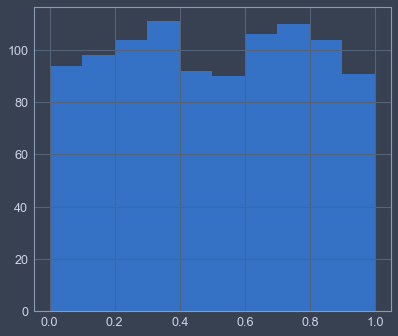

In [121]:
from jupyterthemes import jtplot
jtplot.style()
from matplotlib import pyplot as plt
a = np.random.rand(1000)
plt.hist(a)

In [124]:
np.random.rand(2, 2, 3)

array([[[0.84092696, 0.15404111, 0.40605299],
        [0.61830374, 0.66305625, 0.75540428]],

       [[0.47934162, 0.81599238, 0.24430076],
        [0.19697721, 0.93118508, 0.05595591]]])

(array([   9.,   97.,  505., 1622., 2949., 2783., 1497.,  457.,   74.,
           7.]),
 array([-3.91950434, -3.12788594, -2.33626754, -1.54464913, -0.75303073,
         0.03858768,  0.83020608,  1.62182449,  2.41344289,  3.20506129,
         3.9966797 ]),
 <BarContainer object of 10 artists>)

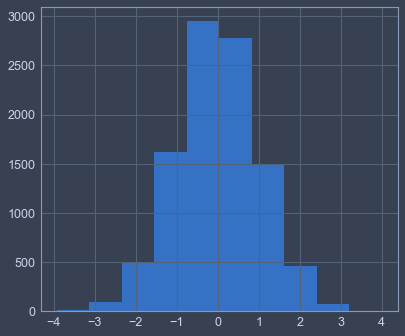

In [134]:
from jupyterthemes import jtplot
jtplot.style()
from matplotlib import pyplot as plt
a = np.random.randn(10000)
# print(a)
# 直方图
plt.hist(a)

In [2]:
np.random.randint(1, 5)

4

In [3]:
# 返回[0,1)之间的整数，所以只有0
np.random.randint(2, size = 5)

array([0, 0, 1, 1, 0])

In [4]:
np.random.randint(-5, 5, size = (2, 2))

array([[-5,  3],
       [ 4,  1]])

In [46]:
print(np.random.rand(2, 3))
print(np.random.sample((2, 3)))
# np.random.rand((2, 3))  # 'tuple' object cannot be interpreted as an integer
# np.random.sample(2, 3)  # random_sample() takes at most 1 positional argument (2 given)

[[0.69440016 0.41417927 0.04995346]
 [0.53589641 0.66379465 0.51488911]]
[[0.94459476 0.58655504 0.90340192]
 [0.1374747  0.13927635 0.80739129]]


In [49]:
np.random.seed(1)
print(np.random.rand(5))
print(np.random.rand(5))

[4.17022005e-01 7.20324493e-01 1.14374817e-04 3.02332573e-01
 1.46755891e-01]
[0.09233859 0.18626021 0.34556073 0.39676747 0.53881673]


In [35]:
np.random.seed(1)
print(np.random.rand(10))
np.random.seed(1)
print(np.random.rand(10))

[4.17022005e-01 7.20324493e-01 1.14374817e-04 3.02332573e-01
 1.46755891e-01 9.23385948e-02 1.86260211e-01 3.45560727e-01
 3.96767474e-01 5.38816734e-01]
[4.17022005e-01 7.20324493e-01 1.14374817e-04 3.02332573e-01
 1.46755891e-01 9.23385948e-02 1.86260211e-01 3.45560727e-01
 3.96767474e-01 5.38816734e-01]


In [50]:
print(np.random.rand(5))
print(np.random.sample(5))

[0.41919451 0.6852195  0.20445225 0.87811744 0.02738759]
[0.67046751 0.4173048  0.55868983 0.14038694 0.19810149]


In [60]:
# np.random.normal([2, 10, 11, 12], [3, 13, 14, 15], 2)  # shape mismatch: objects cannot be broadcast to a single shape
np.random.normal([2, 10, 11, 12], [3, 13, 14, 15], 4)

array([3.5910664 , 1.00841023, 5.44545062, 1.6924095 ])

In [63]:
print(np.random.normal([[1, 2], [3, 4]], [[1, 2], [3, 4]]))
print(np.random.normal([[1, 2], [3, 4]], [[1, 2], [3, 4]]), (2, 2))

[[0.11237104 0.50568341]
 [8.0773638  4.20323102]]
[[0.36300435 2.38183097]
 [9.30076541 4.48063581]] (2, 2)


## 数组其他函数

| 函数名称 | 描述说明                                                     |
| :-------- | :------------------------------------------------------------ |
| resize   | 返回指定形状的新数组。                                       |
| append   | 将元素值添加到数组的末尾。                                   |
| insert   | 沿规定的轴将元素值插入到指定的元素前。                       |
| delete   | 删掉某个轴上的子数组，并返回删除后的新数组。                 |
| argwhere | 返回数组内符合条件的元素的索引值。                           |
| unique   | 用于删除数组中重复的元素，并按元素值由小到大返回一个新数组。 |
| sort   | 对输入数组执行排序，并返回一个数组副本                       |
| argsort  | 沿着指定的轴，对输入数组的元素值进行排序，并返回排序后的元素索引数组 |

`numpy.resize(arr, shape)`
- numpy.resize() 返回指定形状的新数组。
- numpy.resize(arr,shape) 和ndarray.resize(shape, refcheck=False)区别:
    - numpy.resize(arr,shape),有返回值,返回复制内容.如果维度不够,会使用原数组数据补齐
    - ndarray.resize(shape, refcheck=False),修改原数组,不会返回数据,如果维度不够,会使用0补齐

`numpy.append(arr, values, axis=None)`
- 在数组的末尾添加值，默认返回一个一维数组。
- arr：输入的数组；
- values：向 arr 数组中添加的值，需要和 arr 数组的形状匹配；
- axis：
    - 默认为 None，返回的一定是一维数组，无论原数组是什么形状
    - 当 axis = 0 时，会沿着第一个轴追加，追加的值会被添加到新行，而列数保持不变，
    - 若 axis = 1 ，会沿着第二个轴追加。

`numpy.insert(arr, obj, values, axis)`
- 表示沿指定的轴，在给定索引值的前一个位置插入相应的值，如果没有提供轴，则输入数组被展开为一维数组。
- arr：要输入的数组
- obj：表示索引值，在该索引值的位置开始插入 values 值；
- values：要插入的值；
- axis：指定的轴，如果未提供，则输入数组会被展开为一维数组。

`numpy.delete(arr, obj, axis)`
- 该方法表示从输入数组中删除指定的子数组，并返回一个新数组。它与 insert() 函数相似，若不提供 axis 参数，则输入数组被展开为一维数组。
- arr：要输入的数组；
- obj：整数或者整数数组，表示要被删除数组元素下标；
- axis：沿着哪条轴删除子数组。

`np.s_[1: 4]` `np.r_[1: 4]` `np.c_[1: 4]`

`numpy.argwhere(condition(ndarray)`
- **取索引**
- 该函数返回数组中非 0 元素的索引，若是多维数组则返回行、列索引组成的索引坐标。

`numpy.unique(arr, return_index, return_inverse, return_counts)`
- 用于删除数组中重复的元素并排序
- arr：输入数组，若是多维数组则以一维数组形式展开；
- return_index：如果为 True，则返回新数组元素在原数组中第一次出现的位置（索引）；
- return_inverse：如果为 True，则返回原数组元素在新数组中的位置（索引）；
- return_counts：如果为 True，则返回去重后的数组元素在原数组中出现的次数。

`numpy.sort(a, axis, kind, order)`
- 对输入数组执行排序，并返回一个数组副本。
- a：要排序的数组；
- axis：沿着指定轴进行排序，如果没有指定 axis，默认在最后一个轴上排序，若 axis=0 表示按列排序，axis=1 表示按行排序；
- kind：默认为 quicksort（快速排序）；
- order：若数组设置了字段，则 order 表示要排序的字段。
> 自定义结构化数据类型就可以当成字段

`numpy.argsort()`
- argsort() 沿着指定的轴，对输入数组的元素值进行排序，并返回排序后的元素索引数组。
- 参数和`numpy.sort()`类似

In [2]:
a = np.array([[1, 2, 3], [4, 5, 6]])
a

array([[1, 2, 3],
       [4, 5, 6]])

In [35]:
b = np.append(a, [[10, 22, 34, 5], [1, 2, 3, 4], [1, 2, 3, 5]])
b

array([ 1,  2,  3,  4,  5,  6, 10, 22, 34,  5,  1,  2,  3,  4,  1,  2,  3,
        5])

In [18]:
# b = np.append(a, [4, 5, 6], 0)  # all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)
b = np.append(a, [[4, 5, 6]], 0)
b

array([[1, 2, 3],
       [4, 5, 6],
       [4, 5, 6]])

In [29]:
# b = np.append(a, [4, 5], 1)  # all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)
b = np.append(a, [[4], [5]], 1)
b

array([[1, 2, 3, 4],
       [4, 5, 6, 5]])

In [40]:
# b = np.insert(a, 1, [[10, 22, 34, 5], [1, 2, 3, 4], [1, 2, 3, 5]])  # could not broadcast input array from shape (3,4) into shape (3,)
b = np.insert(a, 1, [10, 22, 34, 5, 1, 2, 3, 4, 1, 2, 3, 5])
b

array([ 1, 10, 22, 34,  5,  1,  2,  3,  4,  1,  2,  3,  5,  2,  3,  4,  5,
        6])

In [49]:
b = np.insert(a, 0, [[4, 5, 6]], 0)
b

array([[4, 5, 6],
       [1, 2, 3],
       [4, 5, 6]])

In [48]:
b = np.insert(a, 0, [4, 5, 6], 0)
b

array([[4, 5, 6],
       [1, 2, 3],
       [4, 5, 6]])

In [54]:
b = np.insert(a, 1, [[4, 5]], 1)
b

array([[1, 4, 2, 3],
       [4, 5, 5, 6]])

In [55]:
b = np.insert(a, 1, [4, 5], 1)
b

array([[1, 4, 2, 3],
       [4, 5, 5, 6]])

In [58]:
np.delete(a, [[1, 2]])
np.delete(a, [1, 2])

array([1, 4, 5, 6])

In [62]:
np.delete(a, [[1]], 0)
np.delete(a, [1], 0)

array([[1, 2, 3]])

In [66]:
np.delete(a, [[0]], 1)
np.delete(a, [0], 1)

array([[2, 3],
       [5, 6]])

In [68]:
np.s_[1: 4]

slice(1, 4, None)

In [73]:
np.r_[1: 4]

array([1, 2, 3])

In [74]:
np.c_[1: 4]

array([[1],
       [2],
       [3]])

In [83]:
c = np.array([
    [-2, -4, -1, -3],
    [4, 5, 8, 7], 
    [1, 3, 2, 6]
])
np.argwhere(c < 5)

array([[0, 0],
       [0, 1],
       [0, 2],
       [0, 3],
       [1, 0],
       [2, 0],
       [2, 1],
       [2, 2]], dtype=int64)

In [85]:
a = np.array([5,2,6,2,7,5,6,8,2,9])
# 对a数组的去重
np.unique(a)

array([2, 5, 6, 7, 8, 9])

In [94]:
np.unique(a, return_index = True, return_inverse = True, return_counts = True)

(array([2, 5, 6, 7, 8, 9]),
 array([1, 0, 2, 4, 7, 9], dtype=int64),
 array([1, 0, 2, 0, 3, 1, 2, 4, 0, 5], dtype=int64),
 array([3, 2, 2, 1, 1, 1], dtype=int64))

In [99]:
a = np.array([[3, 7, 5],
             [6, 1, 4]])
print(np.sort(a))
print(np.sort(a, axis=0))
print(np.sort(a, axis=1))

[[3 5 7]
 [1 4 6]]
[[3 1 4]
 [6 7 5]]
[[3 5 7]
 [1 4 6]]


In [101]:
#设置在sort函数中排序字段
dt = np.dtype([('name',  'S10'),('age',  int)])
a = np.array([("raju",21),("anil",25),("ravi",  17),  ("amar",27)], dtype = dt) 
print(np.sort(a, order = 'name'))
print(np.sort(a, order = 'age'))

[(b'amar', 27) (b'anil', 25) (b'raju', 21) (b'ravi', 17)]
[(b'ravi', 17) (b'raju', 21) (b'anil', 25) (b'amar', 27)]


# numpy数据分析

## 多项式拟合

`numpy.polyfit(x, y, deg)`
- 用于`deg`次多项式拟合
- `x`：拟合点的横坐标数组
- `y`：拟合点的纵坐标数组
- `deg`：用于拟合的多项式次数
- 返回的是数组，代表各次幂系数，从高到低
`numpy.poly1d(c_or_r, r=False, variable=None)`
- 用于生成`numpy`中内置的一个代表多项式的类：`numpy.poly1d`
    - `c`属性是系列数组
    - `order`属性是多项式次数
- `c_or_r`：多项式从最高次幂一直到0次幂的系数
- `r`：是否要分解成看出根的形式
- `variable`：多项式中使用的变量符号

In [14]:
import numpy as np
x = np.arange(-1.5, 1.6, 0.5)
y = [-4.45, 0.45, 0.55, 0.05, -0.44, 0.54, 4.55]
an = np.polyfit(x, y, 3)
print(an)
p1 = np.poly1d(an)
print(p1)

[ 2.20000000e+00 -1.42857143e-03 -1.97928571e+00  1.80000000e-01]
     3            2
2.2 x - 0.001429 x - 1.979 x + 0.18
